# Time Series

In [1]:
%run helper.py

os.makedirs("../figures", exist_ok=True)

## Line Charts

In [2]:
df = sns.load_dataset("dowjones")
df.head(5)

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


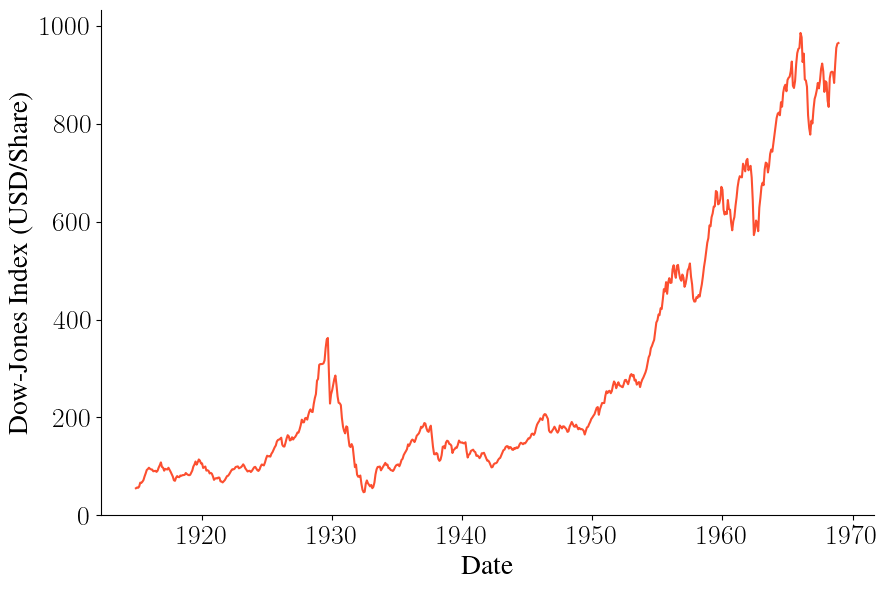

In [3]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df, x="Date", y="Price", ax=ax, color=cc.glasbey_hv[1])
sns.despine(fig)
ax.set_xlabel("Date")
ax.set_ylabel("Dow-Jones Index (USD/Share)")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-dowjones.pdf", bbox_inches="tight", transparent=True)

## Alternatives to Line Charts

In [4]:
df = pd.read_csv("../data/../data/election-results_statistics-finland.csv"
                ).query("Sex == 'Total'"
).rename(columns={"Votes cast (number)":"Votes", "Constituency and municipality in the election year":"Constituency"}
        ).query("Votes != '.' and Constituency == 'Whole country'")
df["Votes"] = df.Votes.astype(int)
df.groupby("Year").agg(dict(Votes="sum"))

,Votes
Year,
1983,2897712
1987,2664192
1991,2631577
1995,2616239
1999,2570062
2003,2745425
2007,2727572
2011,2908057
2015,2941579


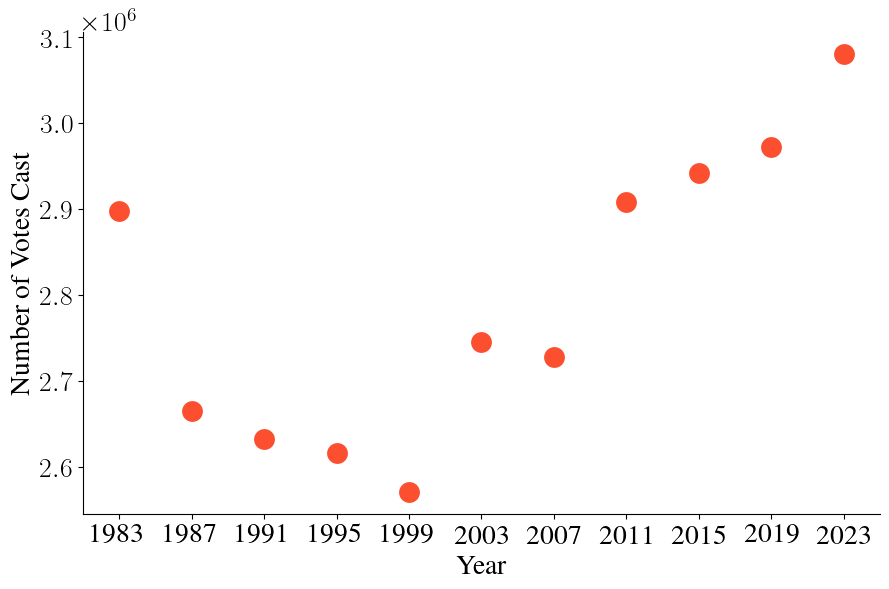

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.stripplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", s=15, ax=ax, color=cc.glasbey_hv[1])
ax.set_ylabel("Number of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_dot-elections_finland.pdf", bbox_inches="tight", transparent=True)

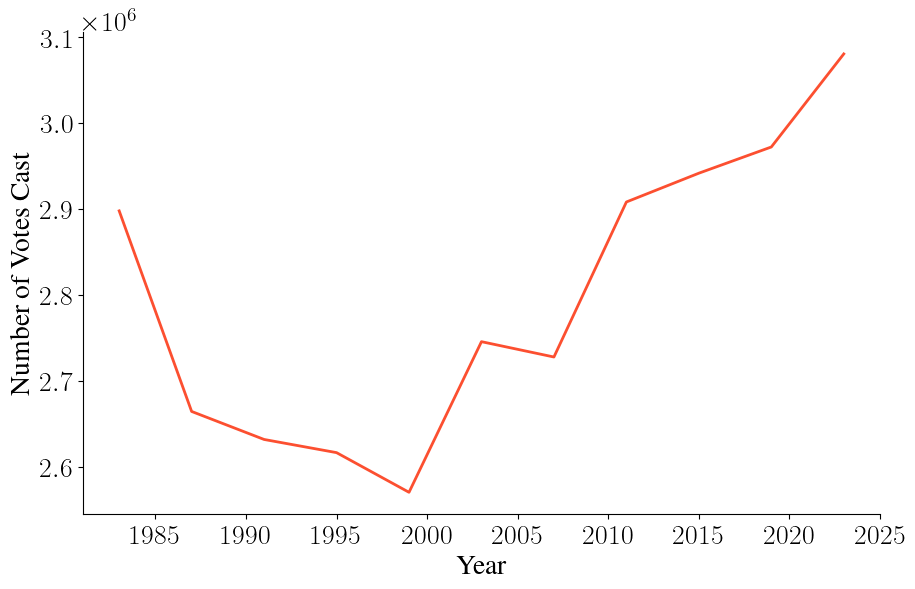

In [6]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", lw=2, 
             ax=ax, color=cc.glasbey_hv[1])
ax.set_ylabel("Number of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-elections_finland.pdf", bbox_inches="tight", transparent=True)

## Box plots as time series

In [7]:
df = pd.read_csv("../data/weather-helsinki-lighthouse_fmi.csv")
df["Month_adj"] = df.Month - 1
df.head(1)

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Month_adj
0,Helsinki lighthouse,2003,7,17,03:00,19.7,6


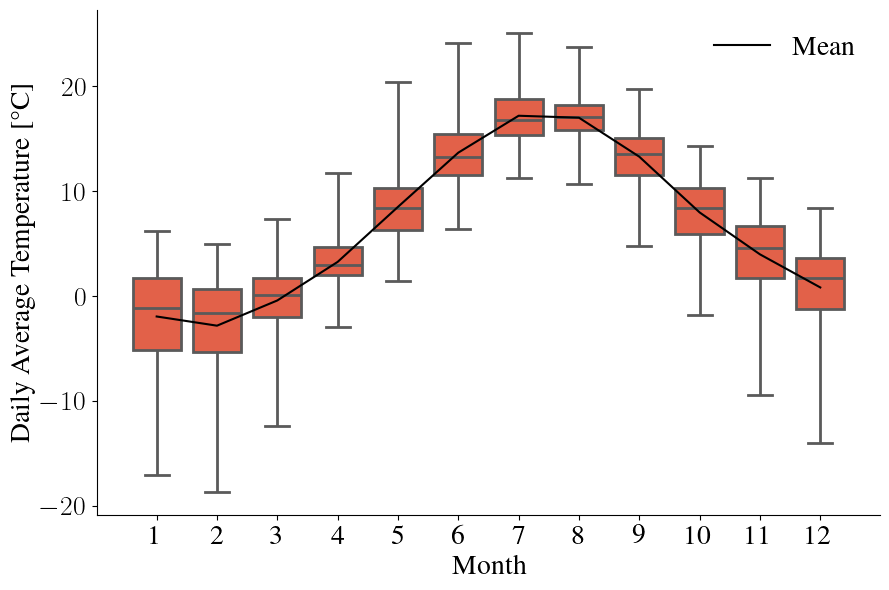

In [8]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.boxplot(df, x="Month", y="Average temperature [°C]", whis=(0,100), ax=ax, color=cc.glasbey_hv[1], linewidth=2)
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="mean", errorbar=None, ax=ax, color="k",
             zorder=100, label="Mean")
sns.despine(fig)
ax.set_ylabel("Daily Average Temperature [°C]")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_box-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

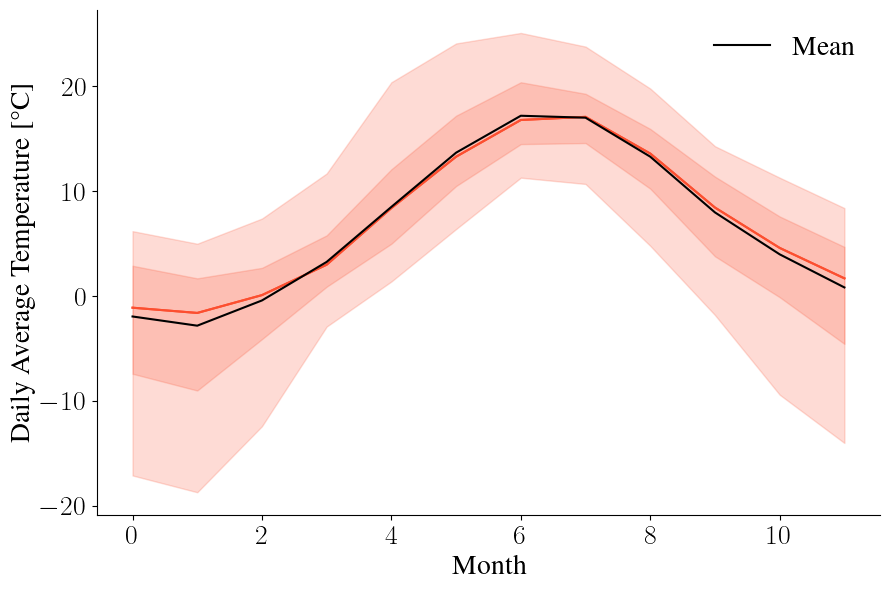

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="median", 
             errorbar=("pi",75), ax=ax, color=cc.glasbey_hv[1])
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="median", 
             errorbar=("pi",100), ax=ax, color=cc.glasbey_hv[1])
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="mean", errorbar=None, ax=ax, color="k",
             zorder=100, label="Mean")
sns.despine(fig)
ax.set_ylabel("Daily Average Temperature [°C]")
ax.set_xlabel("Month")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-weather_helsinki.pdf", bbox_inches="tight", transparent=True)